In [2]:
import xarray as xr
data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

projection_x_coordinate = np.array(data_temp['projection_x_coordinate'])
projection_y_coordinate = np.array(data_temp['projection_y_coordinate'])

scaler = MinMaxScaler()

# Normalize spatial coordinates
pyc = scaler.fit_transform(projection_y_coordinate.reshape(-1, 1))
pxc = scaler.fit_transform(projection_x_coordinate.reshape(-1, 1))

rain = np.array(data_rain['rainfall'])
hurs = np.array(data_hurs['hurs'])
temp = np.array(data_temp['tas'])
temp_max = np.array(data_tmax['tasmax'])
temp_min = np.array(data_tmin['tasmin'])
sun = np.array(data_sun['sun'])
frost = np.array(data_frost['groundfrost'])
psl = np.array(data_psl['psl'])
wind = np.array(data_wind['sfcWind'])

min_length = len(wind)
rain = rain[:min_length]
hurs = hurs[:min_length]
temp = temp[:min_length]
temp_max = temp_max[:min_length]
temp_min = temp_min[:min_length]
sun = sun[:min_length]
frost = frost[:min_length]
wind = wind[:min_length]
psl = psl[:min_length]

In [4]:
# Create meshgrid for spatial coordinates
pyc_mesh, pxc_mesh = np.meshgrid(pyc.flatten(), pxc.flatten())

# Flatten the meshgrid arrays
pyc_flat = pyc_mesh.flatten()
pxc_flat = pxc_mesh.flatten()

# Repeat each spatial coordinate combination for the number of time values
num_time_values = len(rain)
pyc_flat = np.repeat(pyc_flat, num_time_values)
pxc_flat = np.repeat(pxc_flat, num_time_values)

# Flatten time arrays
rain_flat = rain.flatten()
hurs_flat = hurs.flatten()
temp_flat = temp.flatten()
temp_max_flat = temp_max.flatten()
temp_min_flat = temp_min.flatten()
sun_flat = sun.flatten()
frost_flat = frost.flatten()
psl_flat = psl.flatten()
wind_flat = wind.flatten()

# Create DataFrame
df = pd.DataFrame({
    'projection_y_coordinate': pyc_flat,
    'projection_x_coordinate': pxc_flat,
    'Rain': rain_flat,
    'Hurs': hurs_flat,
    'Temp': temp_flat,
    'Temp_Min': temp_min_flat,
    'Temp_Max': temp_max_flat,
    'Sun': sun_flat,
    'Frost': frost_flat,
    'Psl': psl_flat,
    'Wind': wind_flat
})

In [5]:
# List of columns to check for NaN values
columns_to_check = ['Rain', 'Hurs', 'Temp', 'Temp_Min', 'Temp_Max', 'Sun', 'Frost', 'Psl', 'Wind']

# Create a boolean mask indicating rows with NaN values in the specified columns
nan_mask = df[columns_to_check].isnull().any(axis=1)

# Filter the DataFrame to keep rows without NaN values in the specified columns
df_filtered = df[~nan_mask]

In [6]:
df_filtered

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind
852,0.009009,0.0,126.147451,90.974516,7.942743,6.529507,9.483172,52.679074,4.993733,1011.305341,7.837565
932,0.009009,0.0,135.781950,89.126366,8.190250,6.601715,9.772596,53.206094,8.241496,1011.004080,6.831000
933,0.009009,0.0,136.153542,90.382016,7.702709,6.083515,9.391944,51.006741,8.111889,1011.190085,6.065469
934,0.009009,0.0,146.281093,92.148919,7.530887,5.920506,9.284392,50.349402,10.444545,1011.223684,6.494661
1015,0.009009,0.0,131.803960,89.188032,7.908033,6.403731,9.432582,49.513828,7.012561,1011.116773,6.079681
...,...,...,...,...,...,...,...,...,...,...,...
5950794,1.000000,1.0,142.087923,79.461483,3.691437,1.923258,5.506234,10.497998,15.228559,1001.843373,8.494136
5950876,1.000000,1.0,167.382607,79.888634,3.709721,2.035055,5.437188,9.893316,15.112403,1001.732963,9.363961
5950877,1.000000,1.0,175.431880,80.384491,3.909819,2.415599,5.660394,12.051018,14.321967,1001.773660,10.057385
5950959,1.000000,1.0,161.446328,81.476529,3.445058,1.515693,5.425583,9.586379,15.877283,1001.559028,8.303095


In [7]:
# Define the range of years
start_year = 1969
end_year = 2022

# Define the years you want to assign to each row
years = np.arange(start_year, end_year + 1)

# Repeat each year for each combination of spatial coordinate and time value once
num_combinations = len(df_filtered) 
years_repeated = np.tile(years, num_combinations)

# Add the year column to your DataFrame using .loc
df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


C:\Users\iarla\AppData\Local\Temp\ipykernel_8188\2115229586.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


In [8]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Filter rows based on the years of interest
rows_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)]

# Check if there are any rows in the filtered DataFrame
if not rows_of_interest.empty:
    print("Data available for the specified years.")
else:
    print("No data available for the specified years.")

Data available for the specified years.


In [9]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Find the indices of rows corresponding to the years of interest
indices_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)].index

# Create a new DataFrame with the rows corresponding to the years of interest
new_df_filtered = df_filtered.loc[indices_of_interest].copy()

# Remove the filtered rows from the original DataFrame by creating a copy
df_filtered = df_filtered.drop(indices_of_interest)


## Temp

In [10]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Temp'].values

# Features
X = df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

Mean Squared Error: 0.37809197645301695
R-squared Value: 0.9814759655779454


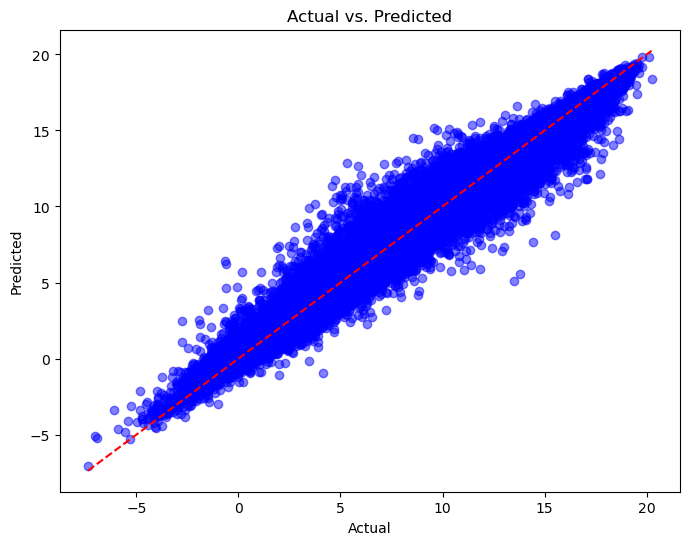

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=150)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [13]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Temp'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = rf_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[6.78238521 6.8090217  6.6092415  ... 3.38026572 3.64074323 3.53896101]
(204610,)


In [14]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual_Temp': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Temp': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual_Temp  Predicted_Temp
0          7.066459        6.782385
1          7.171069        6.809022
2          6.388286        6.609242
3          6.395669        6.220444
4          6.753537        6.200353
...             ...             ...
204605     2.843987        1.128396
204606     2.971155        3.826414
204607     2.712619        3.380266
204608     3.238767        3.640743
204609     2.817050        3.538961

[204610 rows x 2 columns]


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual_Temp'], comparison_df['Predicted_Temp'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual_Temp'], comparison_df['Predicted_Temp'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual_Temp'], comparison_df['Predicted_Temp'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.9787529594115872
Mean Absolute Error: 0.45381519987673136
Mean Squared Error: 0.4344822445363824


## Humidity

In [16]:
y = df_filtered['Hurs'].values

# Features
X = df_filtered.drop(['Hurs'], axis=1).values

Mean Squared Error: 1.1843191066347267
R-squared Value: 0.9421269003457702


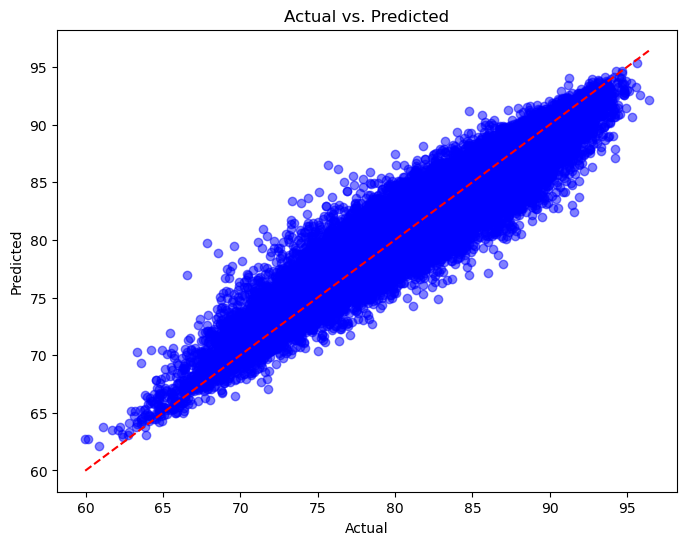

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=150)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [18]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Hurs'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Hurs'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = rf_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[88.12000948 87.10454368 87.72685713 ... 87.37136534 87.34783594
 86.35764887]
(204610,)


In [19]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual_Hurs': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Hurs': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual_Hurs  Predicted_Hurs
0         87.820079       88.120009
1         88.151241       87.104544
2         88.152515       87.726857
3         88.056528       87.733273
4         87.619765       87.335491
...             ...             ...
204605    91.611267       87.102616
204606    83.109668       84.405372
204607    83.474671       87.371365
204608    83.641669       87.347836
204609    84.494217       86.357649

[204610 rows x 2 columns]


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual_Hurs'], comparison_df['Predicted_Hurs'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual_Hurs'], comparison_df['Predicted_Hurs'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual_Hurs'], comparison_df['Predicted_Hurs'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.9311058665446807
Mean Absolute Error: 0.8321633886664567
Mean Squared Error: 1.4193127424245982


## PSL

In [21]:
y = df_filtered['Psl'].values

# Features
X = df_filtered.drop(['Psl'], axis=1).values

Mean Squared Error: 0.34850532543854257
R-squared Value: 0.9894025249853658


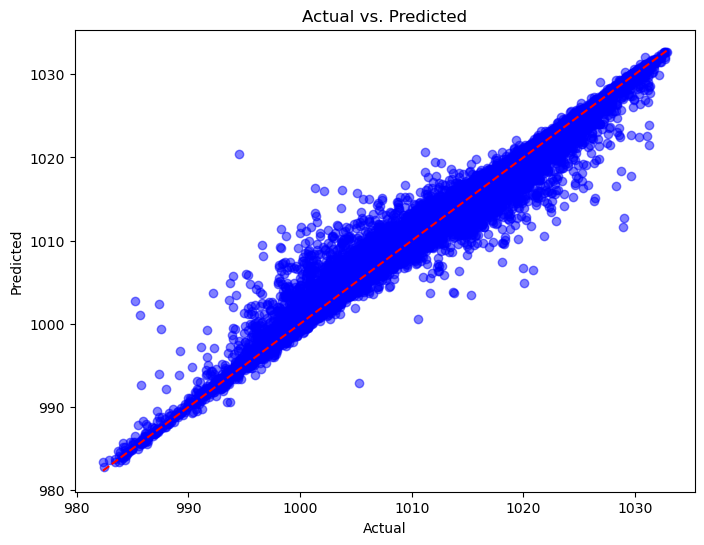

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=150)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [24]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Psl'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Psl'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = rf_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[1011.62934232 1011.59542803 1011.92956081 ... 1007.99685865 1007.95029808
 1005.77191167]
(204610,)


In [25]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual_Psl': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Psl': future_predictions
})

# Display the DataFrame
print(comparison_df)

         Actual_Psl  Predicted_Psl
0       1011.626903    1011.629342
1       1011.716412    1011.595428
2       1011.721162    1011.929561
3       1011.745675    1011.870309
4       1011.804720    1011.890943
...             ...            ...
204605  1005.820466    1006.451647
204606  1004.965121    1006.980017
204607  1004.987608    1007.996859
204608  1005.630589    1007.950298
204609  1005.626068    1005.771912

[204610 rows x 2 columns]


In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual_Psl'], comparison_df['Predicted_Psl'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual_Psl'], comparison_df['Predicted_Psl'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual_Psl'], comparison_df['Predicted_Psl'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.9867828336123482
Mean Absolute Error: 0.30758281930670456
Mean Squared Error: 0.4361040095987862


## Rain

In [10]:
y = df_filtered['Rain'].values

# Features
X = df_filtered.drop(['Rain'], axis=1).values

Mean Squared Error: 653.6543342495346
R-squared Value: 0.8194218745462878


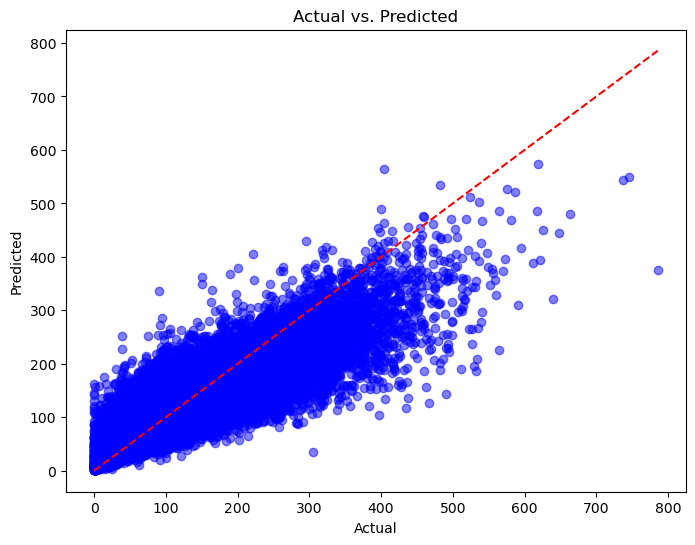

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=150)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [12]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Rain'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Rain'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = rf_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[ 81.3641393   87.37351262  83.87139816 ... 162.09893143 171.91338213
 174.77511493]
(204610,)


In [13]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual_Rain': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Rain': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual_Rain  Predicted_Rain
0         75.122752       81.364139
1         74.722797       87.373513
2         76.758510       83.871398
3         87.381053       80.490825
4         86.084085       72.183159
...             ...             ...
204605    58.625933      101.208139
204606    90.796143      169.189807
204607    82.877643      162.098931
204608    75.343349      171.913382
204609    89.424669      174.775115

[204610 rows x 2 columns]


In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual_Rain'], comparison_df['Predicted_Rain'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual_Rain'], comparison_df['Predicted_Rain'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual_Rain'], comparison_df['Predicted_Rain'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.7954449597240089
Mean Absolute Error: 17.39912021468775
Mean Squared Error: 744.035041043248


## Wind

In [10]:
y = df_filtered['Wind'].values

# Features
X = df_filtered.drop(['Wind'], axis=1).values

Mean Squared Error: 0.4751781025269189
R-squared Value: 0.7900324340386393


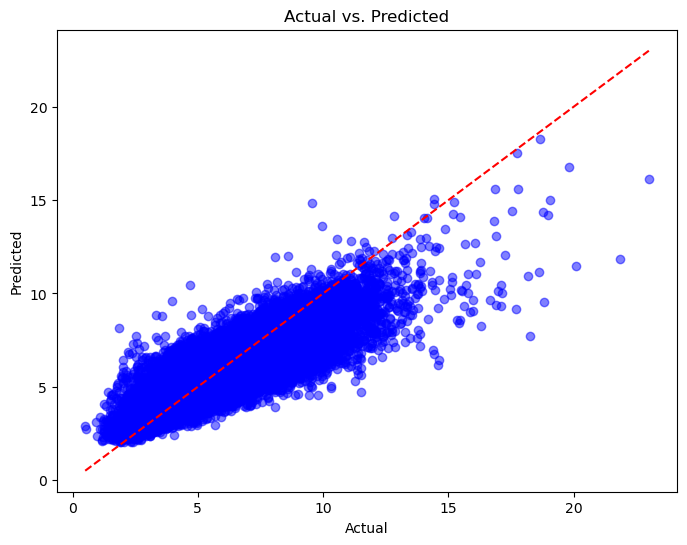

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=150)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [12]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Wind'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Wind'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = rf_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[5.2828127  5.58847972 5.2830423  ... 6.05706957 5.81243489 5.62714221]
(204610,)


In [13]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual_Wind': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Wind': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual_Wind  Predicted_Wind
0          5.792738        5.282813
1          6.466739        5.588480
2          6.913290        5.283042
3          6.015118        5.279789
4          5.273851        5.495790
...             ...             ...
204605     4.238288        5.151266
204606     6.312010        6.779593
204607     5.407377        6.057070
204608     5.545080        5.812435
204609     6.123321        5.627142

[204610 rows x 2 columns]


In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual_Wind'], comparison_df['Predicted_Wind'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual_Wind'], comparison_df['Predicted_Wind'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual_Wind'], comparison_df['Predicted_Wind'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.771771789281055
Mean Absolute Error: 0.509387294132639
Mean Squared Error: 0.5230962396932269


## Frost

In [15]:
y = df_filtered['Frost'].values

# Features
X = df_filtered.drop(['Frost'], axis=1).values

Mean Squared Error: 2.0578866913351552
R-squared Value: 0.9676629202671791


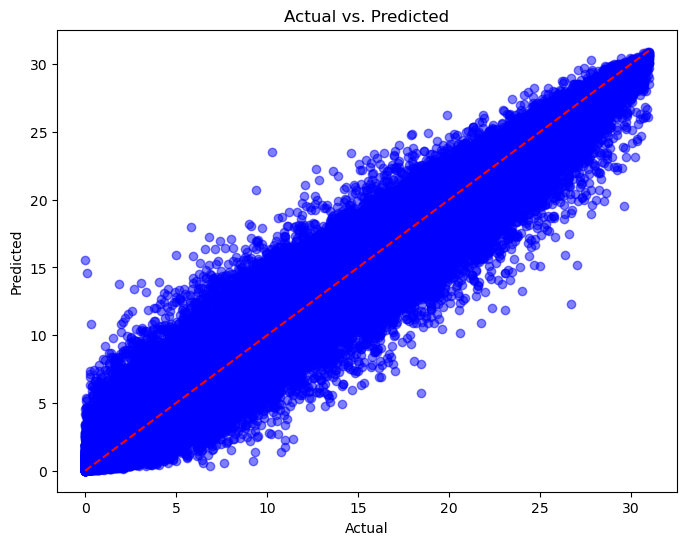

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=150)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [19]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Frost'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Frost'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = rf_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[17.12031484 16.37835351 18.49863015 ... 12.84493207 12.63156484
 12.82094314]
(204610,)


In [20]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual_Frost': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Frost': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual_Frost  Predicted_Frost
0          15.754712        17.120315
1          13.303446        16.378354
2          15.631113        18.498630
3          17.834980        19.003796
4          17.885060        17.754118
...              ...              ...
204605     21.085514        13.942155
204606      8.794880        12.473074
204607     11.434160        12.844932
204608     10.612270        12.631565
204609     11.616522        12.820943

[204610 rows x 2 columns]


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual_Frost'], comparison_df['Predicted_Frost'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual_Frost'], comparison_df['Predicted_Frost'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual_Frost'], comparison_df['Predicted_Frost'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.963132313137621
Mean Absolute Error: 1.0441348091260447
Mean Squared Error: 2.3540155180875115


## Sun

In [10]:
y = df_filtered['Sun'].values

# Features
X = df_filtered.drop(['Sun'], axis=1).values

Mean Squared Error: 121.50537362233536
R-squared Value: 0.9672690930554373


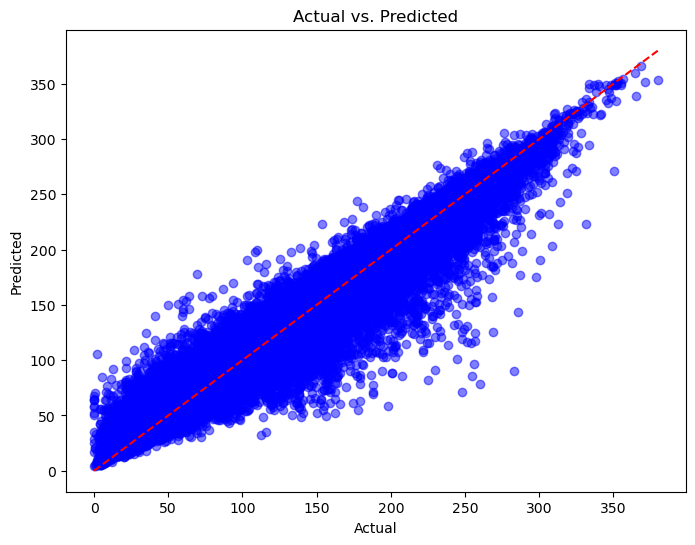

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=150)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [14]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Sun'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Sun'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = rf_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[64.6755097  68.95569234 66.4763491  ... 43.84137076 50.6908904
 37.99697684]
(204610,)


In [15]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual_Sun': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Sun': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual_Sun  Predicted_Sun
0        61.328209      64.675510
1        68.660224      68.955692
2        68.277069      66.476349
3        69.733919      63.879052
4        71.662597      64.303735
...            ...            ...
204605   28.193768      44.400928
204606   22.561367      46.080706
204607   20.168091      43.841371
204608   20.177609      50.690890
204609   22.934566      37.996977

[204610 rows x 2 columns]


In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual_Sun'], comparison_df['Predicted_Sun'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual_Sun'], comparison_df['Predicted_Sun'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual_Sun'], comparison_df['Predicted_Sun'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.9615606436205126
Mean Absolute Error: 7.808324530273151
Mean Squared Error: 142.36931718571216
